In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import json
import matplotlib
%matplotlib inline

## Vendite

In [2]:
palette = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b',
           '#e377c2','#7f7f7f','#bcbd22','#17becf','#ffff00','#66ff33',
          '#ff0066','#660066']
plt.rcParams['xtick.labelsize']=15

In [3]:
df1 =pd.read_csv('lineplot\\cities_upd_v.csv')
df1 = df1.set_index('city').T
df1.index = pd.to_datetime(df1.index)
df1.index.freq='MS'
df1.head()

city,roma,firenze,milano,napoli,torino,bari,catania,palermo,bologna,venezia,genova,messina,reggio-calabria,cagliari
2012-09-01,4460,4051,3986,3756,2208,2572,1929,2029,3089,3705,2683,1647,1289,2546
2012-10-01,4446,4008,3961,3768,2208,2569,1927,1999,3071,3736,2700,1633,1257,2526
2012-11-01,4415,3988,3922,3797,2221,2553,1909,1997,3058,3662,2699,1609,1258,2494
2012-12-01,4381,3973,3914,3768,2215,2530,1906,2017,3035,3565,2684,1598,1261,2456
2013-01-01,4366,3956,3916,3755,2207,2505,1908,2007,3017,3548,2674,1596,1274,2460


C:\Users\Tommaso\anaconda3\envs\tsa_course\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


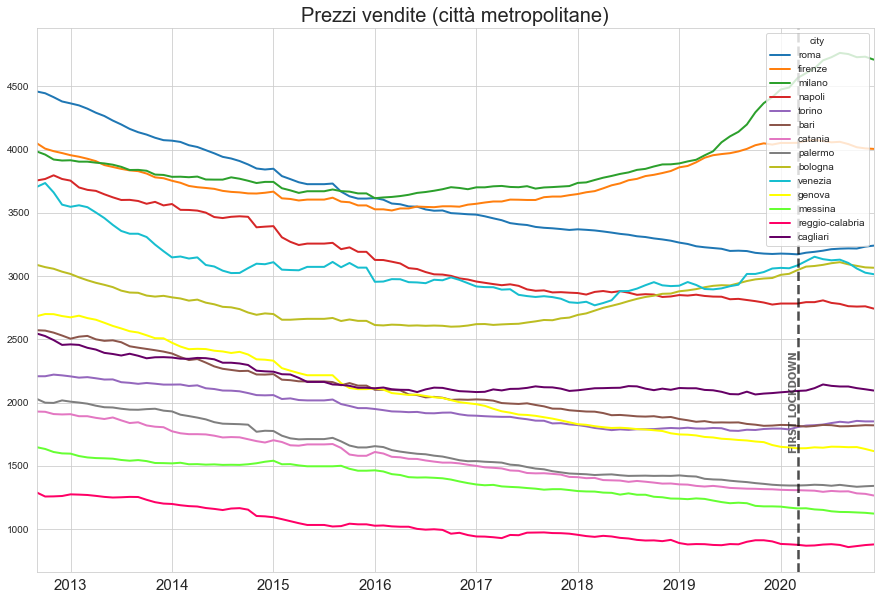

In [4]:
df1.plot(figsize= (15,10), color=palette, lw=2).autoscale(axis='x',tight=True)
plt.axvline(x='2020-03-01', c = 'black', ls ='--', lw=2.5, alpha = 0.7)
plt.text('2020-02-01',2000, "FIRST LOCKDOWN", rotation=90, verticalalignment='center', fontname='Helvetica', alpha = 0.7, size=10, weight='bold')
plt.title('Prezzi vendite (città metropolitane)', fontsize = 20, fontname='sans-serif');

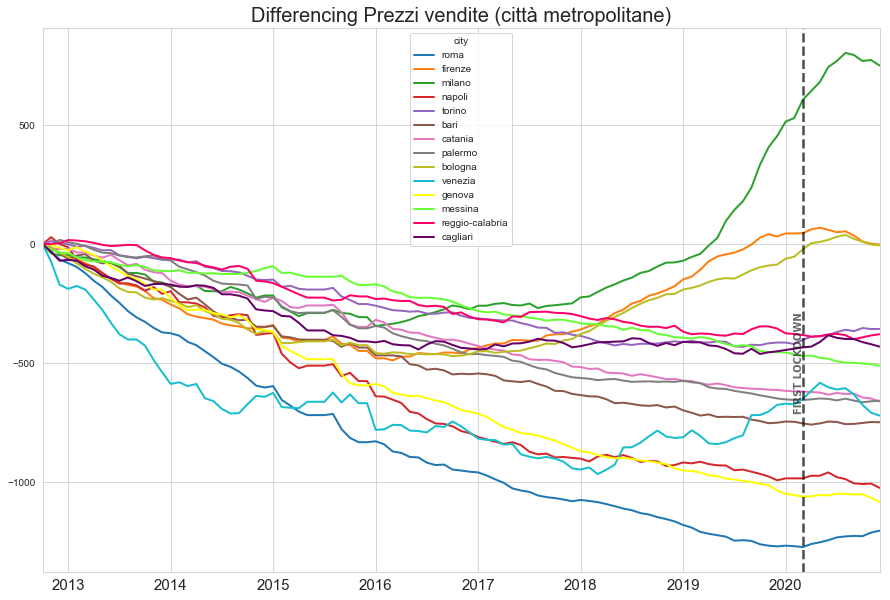

In [5]:
dfs = df1.copy().iloc[1:]
for colname in dfs.columns:
    dfs[colname] = dfs[colname].apply(lambda x : x - dfs[colname].iloc[0]+1)
    
dfs.plot(figsize= (15,10), color=palette, lw=2).autoscale(axis='x',tight=True)
plt.axvline(x='2020-03-01', c = 'black', ls ='--', lw=2.5, alpha = 0.7)
plt.text('2020-02-01',-500, "FIRST LOCKDOWN", rotation=90, verticalalignment='center', fontname='Helvetica', alpha = 0.7, size=10, weight='bold')
plt.title('Differencing Prezzi vendite (città metropolitane)', fontsize = 20);

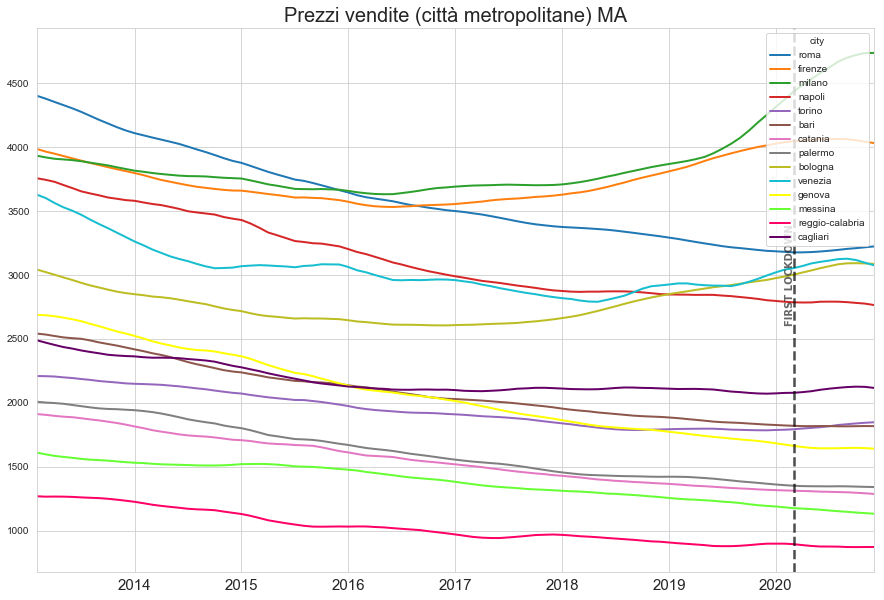

In [6]:
for colname in df1.columns:
    df1[colname] = df1[colname].rolling(window = 6).mean()
    
df1 = df1.iloc[5:]

df1.plot(figsize= (15,10), color=palette, lw=2).autoscale(axis='x',tight=True)
plt.axvline(x='2020-03-01', c = 'black', ls ='--', lw=2.5, alpha = 0.7)
plt.text('2020-02-01',3000, "FIRST LOCKDOWN", rotation=90, verticalalignment='center', fontname='Helvetica', alpha = 0.7, size=10, weight='bold')
plt.title('Prezzi vendite (città metropolitane) MA', fontsize = 20);

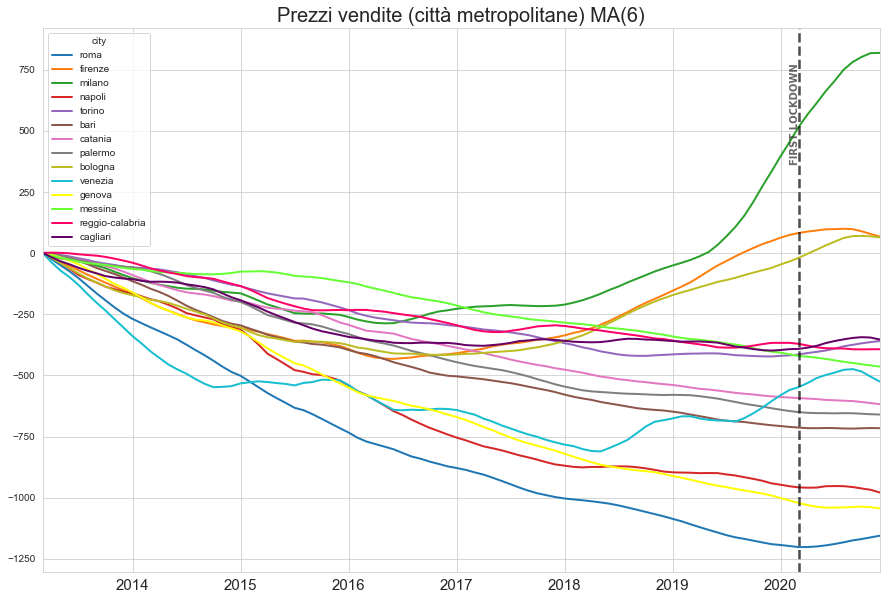

In [7]:
for colname in df1.columns:
    dfs[colname] = dfs[colname].rolling(window = 6).mean()
    
dfs = dfs.iloc[5:]

for colname in dfs.columns:
    dfs[colname] = dfs[colname].apply(lambda x : x - dfs[colname].iloc[0]+1)
    
dfs.plot(figsize= (15,10), color=palette, lw=2).autoscale(axis='x',tight=True)
plt.axvline(x='2020-03-01', c = 'black', ls ='--', lw=2.5, alpha = 0.7)
plt.text('2020-02-01',570, "FIRST LOCKDOWN", rotation=90, verticalalignment='center', fontname='Helvetica', alpha = 0.7, size=10, weight='bold')
plt.title('Prezzi vendite (città metropolitane) MA(6)', fontsize = 20);
#plt.savefig('lineplot\\metrop_vendite_immobili_MA.png')

### ETS Decomposition

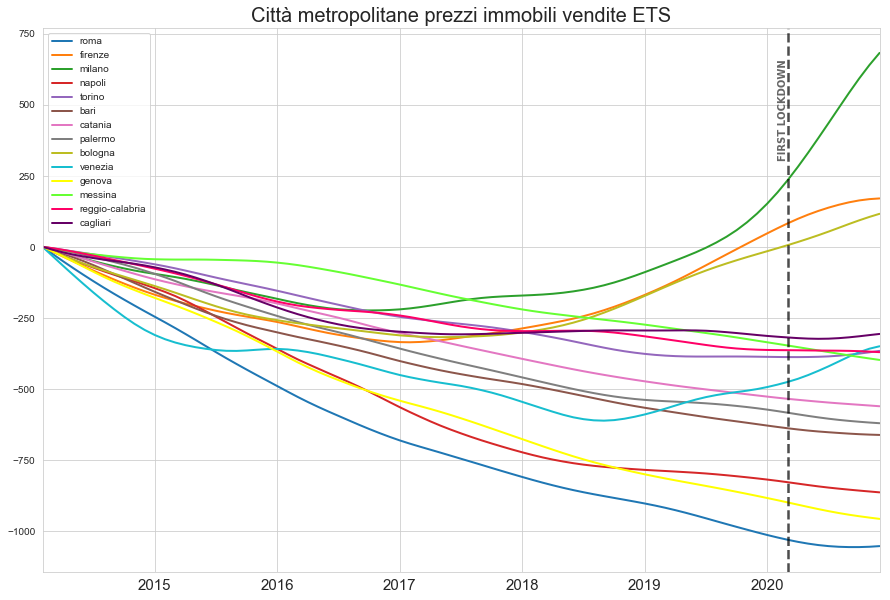

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df1['roma'], model='mul',two_sided=False)
dfd=pd.DataFrame(pd.Series(result.trend).dropna())

for city in df1.columns:
    result = seasonal_decompose(df1[city], model='mul',two_sided=False)
    ser = pd.Series(result.trend).dropna()
    dfd[ser.name] = ser


for colname in dfd.columns:
    dfd[colname] = dfd[colname].apply(lambda x : x - dfd[colname].iloc[0]+1)
    
dfd.plot(figsize= (15,10), color=palette, lw=2).autoscale(axis='x',tight=True)
plt.axvline(x='2020-03-01', c = 'black', ls ='--', lw=2.5, alpha = 0.7)
plt.text('2020-02-01',480, "FIRST LOCKDOWN", rotation=90, verticalalignment='center', fontname='Helvetica', alpha = 0.7, size=10, weight='bold')
plt.legend()
plt.title('Città metropolitane prezzi immobili vendite ETS',fontsize=20);
#plt.savefig('lineplot\\metrop_vendite_immobili_ETS.png')

#### HP filter

In [9]:
from statsmodels.tsa.filters.hp_filter import hpfilter


for colname in df1.columns:
# Tuple unpacking
    cycle, df1[colname] = hpfilter(df1[colname], lamb=14400)

for colname in df1.columns:
    df1[colname] = df1[colname].apply(lambda x : x - df1[colname].iloc[0]+1)

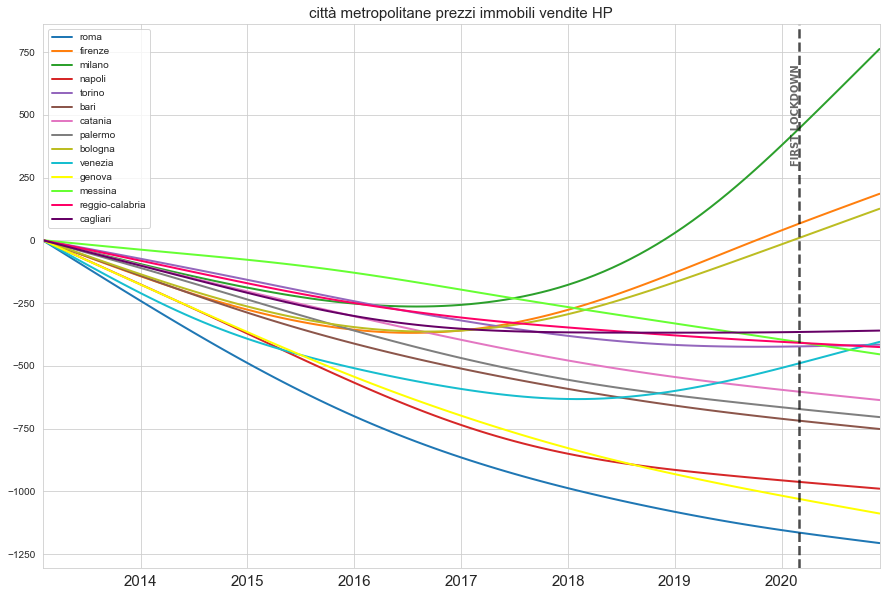

In [10]:
df1.plot(figsize= (15,10), color=palette, lw=2).autoscale(axis='x',tight=True)

plt.axvline(x='2020-03-01', c = 'black', ls ='--', lw=2.5, alpha = 0.7)
plt.text('2020-02-01',500, "FIRST LOCKDOWN", rotation=90, verticalalignment='center', fontname='Helvetica', alpha = 0.7, size=10, weight='bold')
plt.legend()
plt.title('città metropolitane prezzi immobili vendite HP',fontsize=15);
#plt.savefig('lineplot\\metrop_vendite_immobili_HP')

## Affitti

In [11]:
df1 =pd.read_csv('lineplot\\cities_upd_a.csv')
df1 = df1.set_index('city').T
df1.index = pd.to_datetime(df1.index)
df1.head()

city,roma,firenze,milano,napoli,torino,bari,catania,palermo,bologna,venezia,genova,messina,reggio-calabria,cagliari
2012-09-01,16.2,13.3,15.5,12.2,8.9,8.8,7.4,7.6,10.7,12.6,9.3,6.3,4.9,8.5
2012-10-01,16.1,13.3,15.5,12.2,8.9,8.7,7.3,7.6,10.6,12.8,9.2,6.3,4.7,8.5
2012-11-01,15.9,13.3,15.4,12.1,8.9,8.7,7.4,7.6,10.7,12.4,9.2,6.4,4.8,8.8
2012-12-01,15.8,13.3,15.4,12.1,8.9,8.6,7.4,7.6,10.7,12.3,9.1,6.4,4.8,8.9
2013-01-01,15.7,13.4,15.4,12.0,8.8,8.6,7.4,7.6,10.7,12.2,9.0,6.4,4.9,9.1


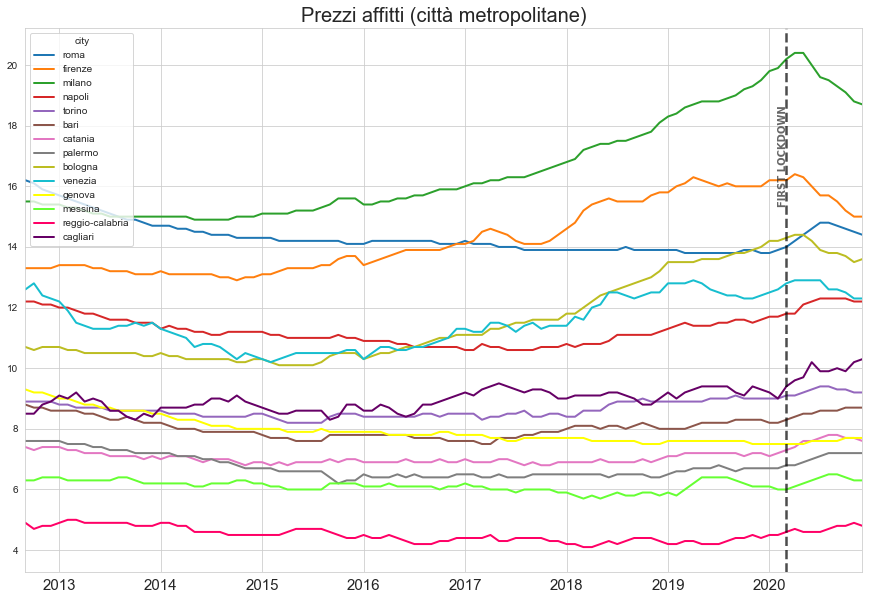

In [12]:
df1.plot(figsize= (15,10), color=palette, lw=2).autoscale(axis='x',tight=True)
plt.axvline(x='2020-03-01', c = 'black', ls ='--', lw=2.5, alpha = 0.7)
plt.text('2020-02-01',17, "FIRST LOCKDOWN", rotation=90, verticalalignment='center', fontname='Helvetica', alpha = 0.7, size=10, weight='bold')
plt.title('Prezzi affitti (città metropolitane)', fontsize = 20);

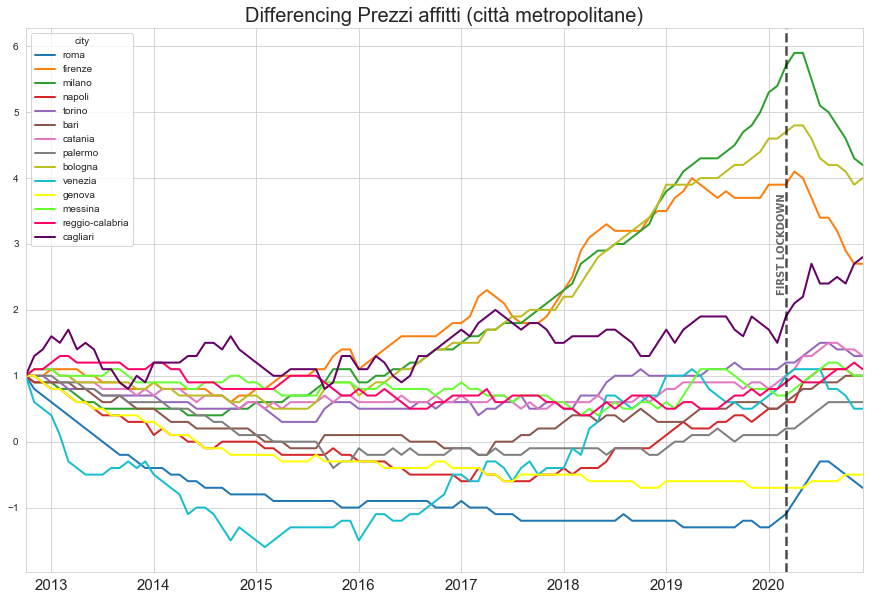

In [13]:
dfs = df1.copy().iloc[1:]
for colname in dfs.columns:
    dfs[colname] = dfs[colname].apply(lambda x : x - dfs[colname].iloc[0]+1)
    
dfs.plot(figsize= (15,10), color=palette, lw=2).autoscale(axis='x',tight=True)
plt.axvline(x='2020-03-01', c = 'black', ls ='--', lw=2.5, alpha = 0.7)
plt.text('2020-02-01',3, "FIRST LOCKDOWN", rotation=90, verticalalignment='center', fontname='Helvetica', alpha = 0.7, size=10, weight='bold')
plt.title('Differencing Prezzi affitti (città metropolitane)', fontsize = 20);

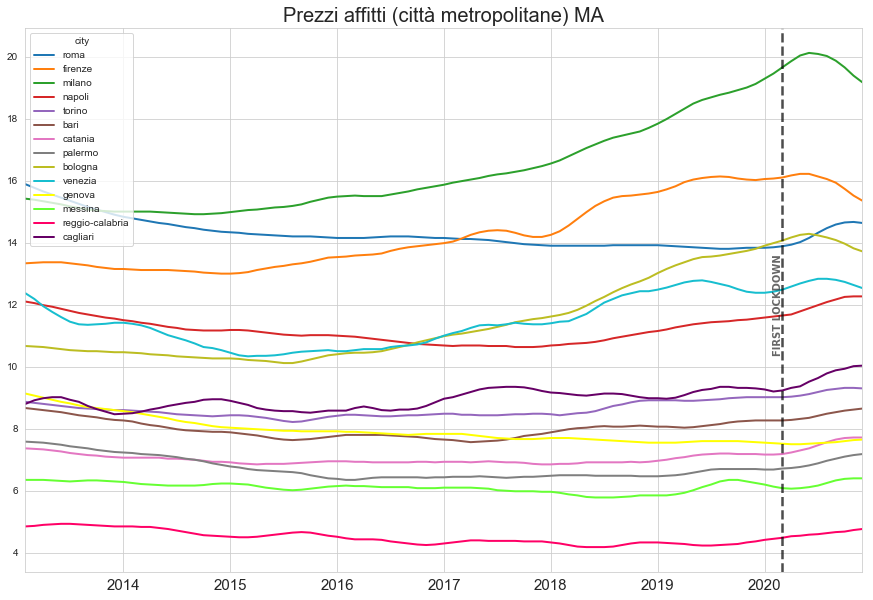

In [14]:
for colname in df1.columns:
    df1[colname] = df1[colname].rolling(window = 6).mean()
    
df1 = df1.iloc[5:]

df1.plot(figsize= (15,10), color=palette, lw=2).autoscale(axis='x',tight=True)
plt.axvline(x='2020-03-01', c = 'black', ls ='--', lw=2.5, alpha = 0.7)
plt.text('2020-02-01',12, "FIRST LOCKDOWN", rotation=90, verticalalignment='center', fontname='Helvetica', alpha = 0.7, size=10, weight='bold')
plt.title('Prezzi affitti (città metropolitane) MA', fontsize = 20);

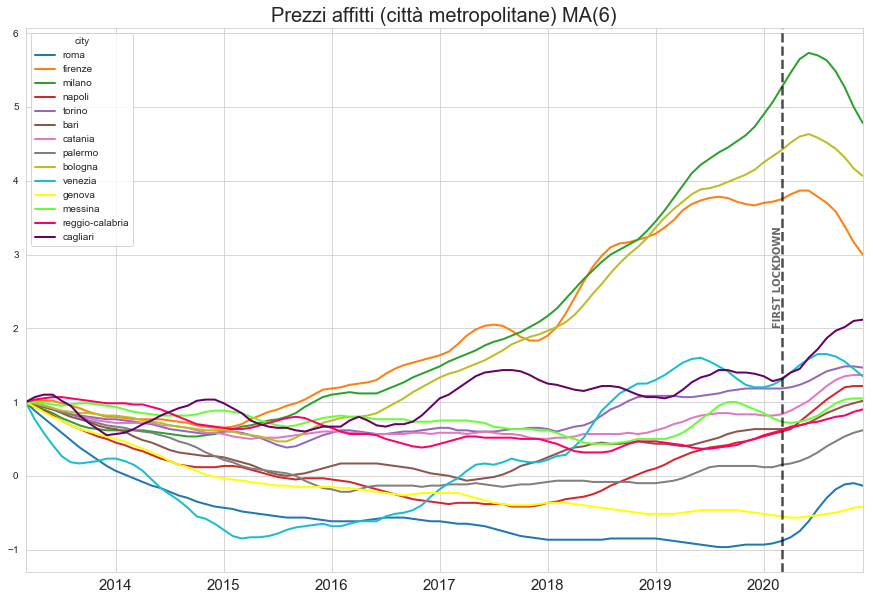

In [15]:
for colname in df1.columns:
    dfs[colname] = dfs[colname].rolling(window = 6).mean()
    
dfs = dfs.iloc[5:]

for colname in dfs.columns:
    dfs[colname] = dfs[colname].apply(lambda x : x - dfs[colname].iloc[0]+1)
    
dfs.plot(figsize= (15,10), color=palette, lw=2).autoscale(axis='x',tight=True)
plt.axvline(x='2020-03-01', c = 'black', ls ='--', lw=2.5, alpha = 0.7)
plt.text('2020-02-01',2.7, "FIRST LOCKDOWN", rotation=90, verticalalignment='center', fontname='Helvetica', alpha = 0.7, size=10, weight='bold')
plt.title('Prezzi affitti (città metropolitane) MA(6)', fontsize = 20);
#plt.savefig('lineplot\\metrop_affitti_immobili_MA.png')

### ETS Decomposition

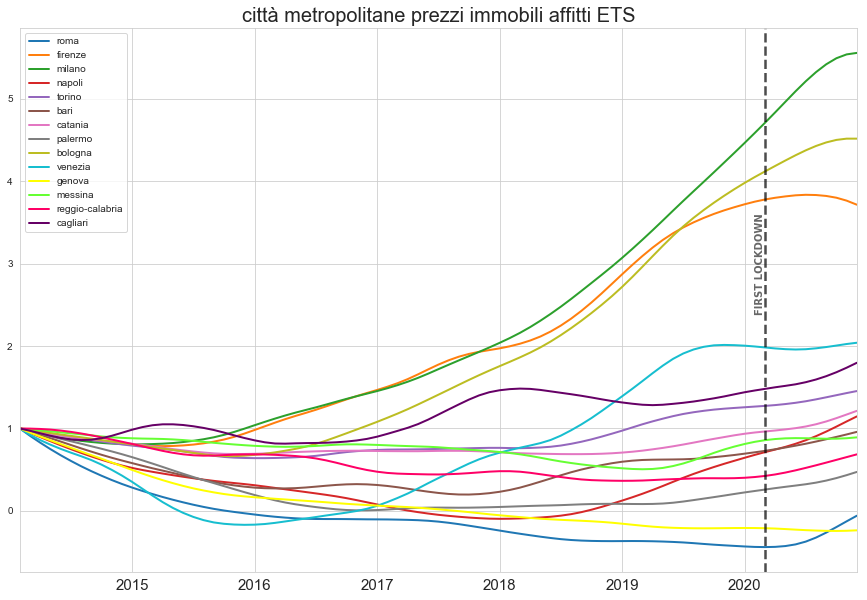

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df1['roma'], model='mul',two_sided=False)
dfd=pd.DataFrame(pd.Series(result.trend).dropna())

for city in df1.columns:
    result = seasonal_decompose(df1[city], model='mul',two_sided=False)
    ser = pd.Series(result.trend).dropna()
    dfd[ser.name] = ser


for colname in dfd.columns:
    dfd[colname] = dfd[colname].apply(lambda x : x - dfd[colname].iloc[0]+1)
    
dfd.plot(figsize= (15,10), color=palette, lw=2).autoscale(axis='x',tight=True)
plt.axvline(x='2020-03-01', c = 'black', ls ='--', lw=2.5, alpha = 0.7)
plt.text('2020-02-01',3, "FIRST LOCKDOWN", rotation=90, verticalalignment='center', fontname='Helvetica', alpha = 0.7, size=10, weight='bold')
plt.legend()
plt.title('città metropolitane prezzi immobili affitti ETS',fontsize=20);
#plt.savefig('lineplot\\metrop_affitti_immobili_ETS.png')

#### HP filter

In [17]:
from statsmodels.tsa.filters.hp_filter import hpfilter


for colname in df1.columns:
# Tuple unpacking
    cycle, df1[colname] = hpfilter(df1[colname], lamb=14400)

for colname in df1.columns:
    df1[colname] = df1[colname].apply(lambda x : x - df1[colname].iloc[0]+1)

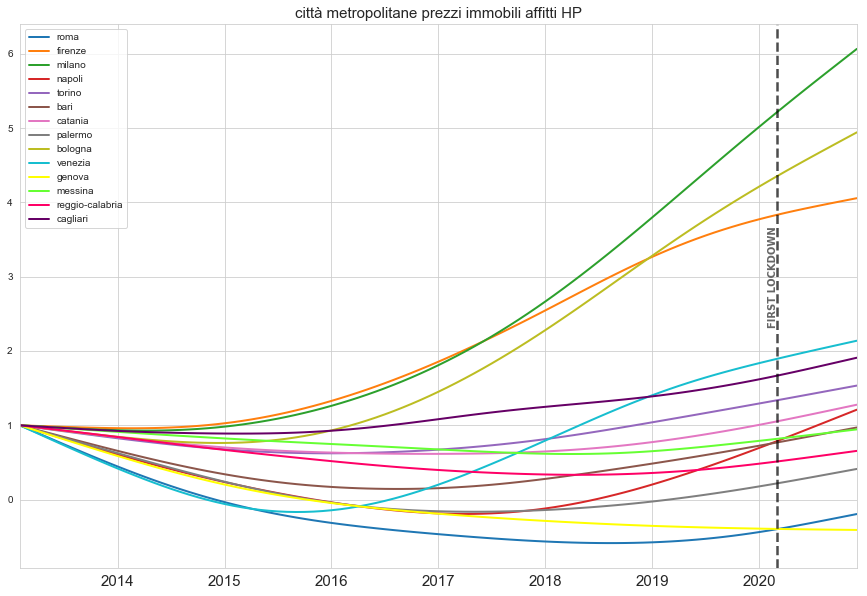

In [18]:
df1.plot(figsize= (15,10), color=palette, lw=2).autoscale(axis='x',tight=True)
plt.axvline(x='2020-03-01', c = 'black', ls ='--', lw=2.5, alpha = 0.7)
plt.text('2020-02-01',3, "FIRST LOCKDOWN", rotation=90, verticalalignment='center', fontname='Helvetica', alpha = 0.7, size=10, weight='bold')
plt.legend()
plt.title('città metropolitane prezzi immobili affitti HP',fontsize=15);
#plt.savefig('lineplot\\metrop_vendite_immobili_HP')